<a href="https://colab.research.google.com/github/Shibli-Nomani/datascience/blob/main/HW13_CrossValidation_and_Sampling_with_XGBOOST_ADABOOST_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analysis >>> Data Visualization >>> Data Preprocessing +mpare Data Imbalance >>> Feature Scaling/Encoding >>> nosampling/sampling >>> Cross Validation >>> ML Model >>> Accuracy check >>> GraphicalCompare
1. Sampling
a. No Sampling b. SMOTETomek(Oversampling) c. Under Sampling d. Over Sampling
2. Cross Validation
a. Hold Out
b. K-fold
c. Stratified K-fold
d. Leave-on Out
3. ML Algorithm: Logistic Regression, Decision Tree, XGBOOST, ADA BOOST


In [2]:
from google.colab import drive

drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
path='/content/gdrive/MyDrive/AIQUEST ML Course/Cross validation/data.csv'
df = pd.read_csv(path)
df.head(5)

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6607,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,2,25.30,2153,1
1,2598,0,0,0,0,7,1,0,1,0,...,2,0,0,0,0,1,2,75.15,4396,0
2,2345,0,0,0,1,4,1,0,2,1,...,1,1,1,1,0,1,0,20.05,6211,0
3,4093,0,0,0,0,29,1,2,1,0,...,0,0,0,0,0,1,1,76.00,1850,0
4,693,0,0,0,0,3,1,2,1,0,...,0,0,0,0,0,1,1,75.10,2350,1


In [4]:
df.shape

(5282, 21)

In [5]:
df.isnull().sum()

Unnamed: 0          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#drop null values if exists
df = df.dropna()

In [7]:
#drop duplicates
df.drop_duplicates(inplace=True)

#Imbalance in Dataset

In [8]:
df.Churn.value_counts()

0    3892
1    1390
Name: Churn, dtype: int64

In [9]:
#Target imbalance
not_churn=3892 / (3892+1390)
not_churn

0.7368421052631579

In [10]:
churn=1 - not_churn
churn

0.26315789473684215

##Task-1: Analysis the dataset using seaborn / matplotlib / scatter

In [11]:
df.corr()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Unnamed: 0,1.000000,-0.000100,0.000731,-0.001294,-0.011669,0.001884,-0.034278,-0.013540,-0.018709,-0.006494,...,-0.013033,0.006410,-0.005278,-0.020546,-0.003440,0.010875,0.025083,-0.014253,0.015267,0.010374
gender,-0.000100,1.000000,-0.005691,-0.010143,0.011058,0.001303,-0.009706,-0.000430,-0.005294,-0.020189,...,-0.009305,-0.010619,-0.012994,-0.011420,0.000555,-0.014090,0.010188,-0.018822,-0.022718,-0.011997
SeniorCitizen,0.000731,-0.005691,1.000000,0.016648,-0.211271,0.006176,0.000581,0.129040,-0.040186,-0.129719,...,-0.015922,-0.151078,0.024338,0.043124,-0.151939,0.156417,-0.035050,0.219945,0.040956,0.146549
Partner,-0.001294,-0.010143,0.016648,1.000000,0.447629,0.382432,0.031578,0.151068,0.007205,0.159928,...,0.168815,0.132582,0.136715,0.122310,0.303243,-0.020634,-0.160535,0.105603,0.069859,-0.150053
Dependents,-0.011669,0.011058,-0.211271,0.447629,1.000000,0.162933,-0.005830,-0.020722,0.041972,0.157262,...,0.076783,0.137274,0.045948,0.023907,0.243080,-0.109935,-0.040414,-0.114920,-0.013196,-0.164490
tenure,0.001884,0.001303,0.006176,0.382432,0.162933,1.000000,0.005912,0.354790,-0.032037,0.325451,...,0.369331,0.326993,0.288135,0.301600,0.671184,0.004043,-0.360323,0.253605,0.152843,-0.345544
PhoneService,-0.034278,-0.009706,0.000581,0.031578,-0.005830,0.005912,1.000000,-0.016345,0.385682,-0.007874,...,0.000422,-0.006139,0.055390,0.048362,0.005342,0.014489,0.006362,0.247419,0.081045,0.010122
MultipleLines,-0.013540,-0.000430,0.129040,0.151068,-0.020722,0.354790,-0.016345,1.000000,-0.105796,0.006028,...,0.132798,0.019266,0.172380,0.188860,0.120023,0.172369,-0.176313,0.436398,0.118773,0.031270
InternetService,-0.018709,-0.005294,-0.040186,0.007205,0.041972,-0.032037,0.385682,-0.105796,1.000000,-0.027201,...,0.048320,-0.018510,0.101060,0.092672,0.097158,-0.141856,0.095054,-0.325588,-0.064748,-0.048820
OnlineSecurity,-0.006494,-0.020189,-0.129719,0.159928,0.157262,0.325451,-0.007874,0.006028,-0.027201,1.000000,...,0.182355,0.276510,0.057760,0.065996,0.371159,-0.146473,-0.085892,-0.049605,0.036493,-0.288926


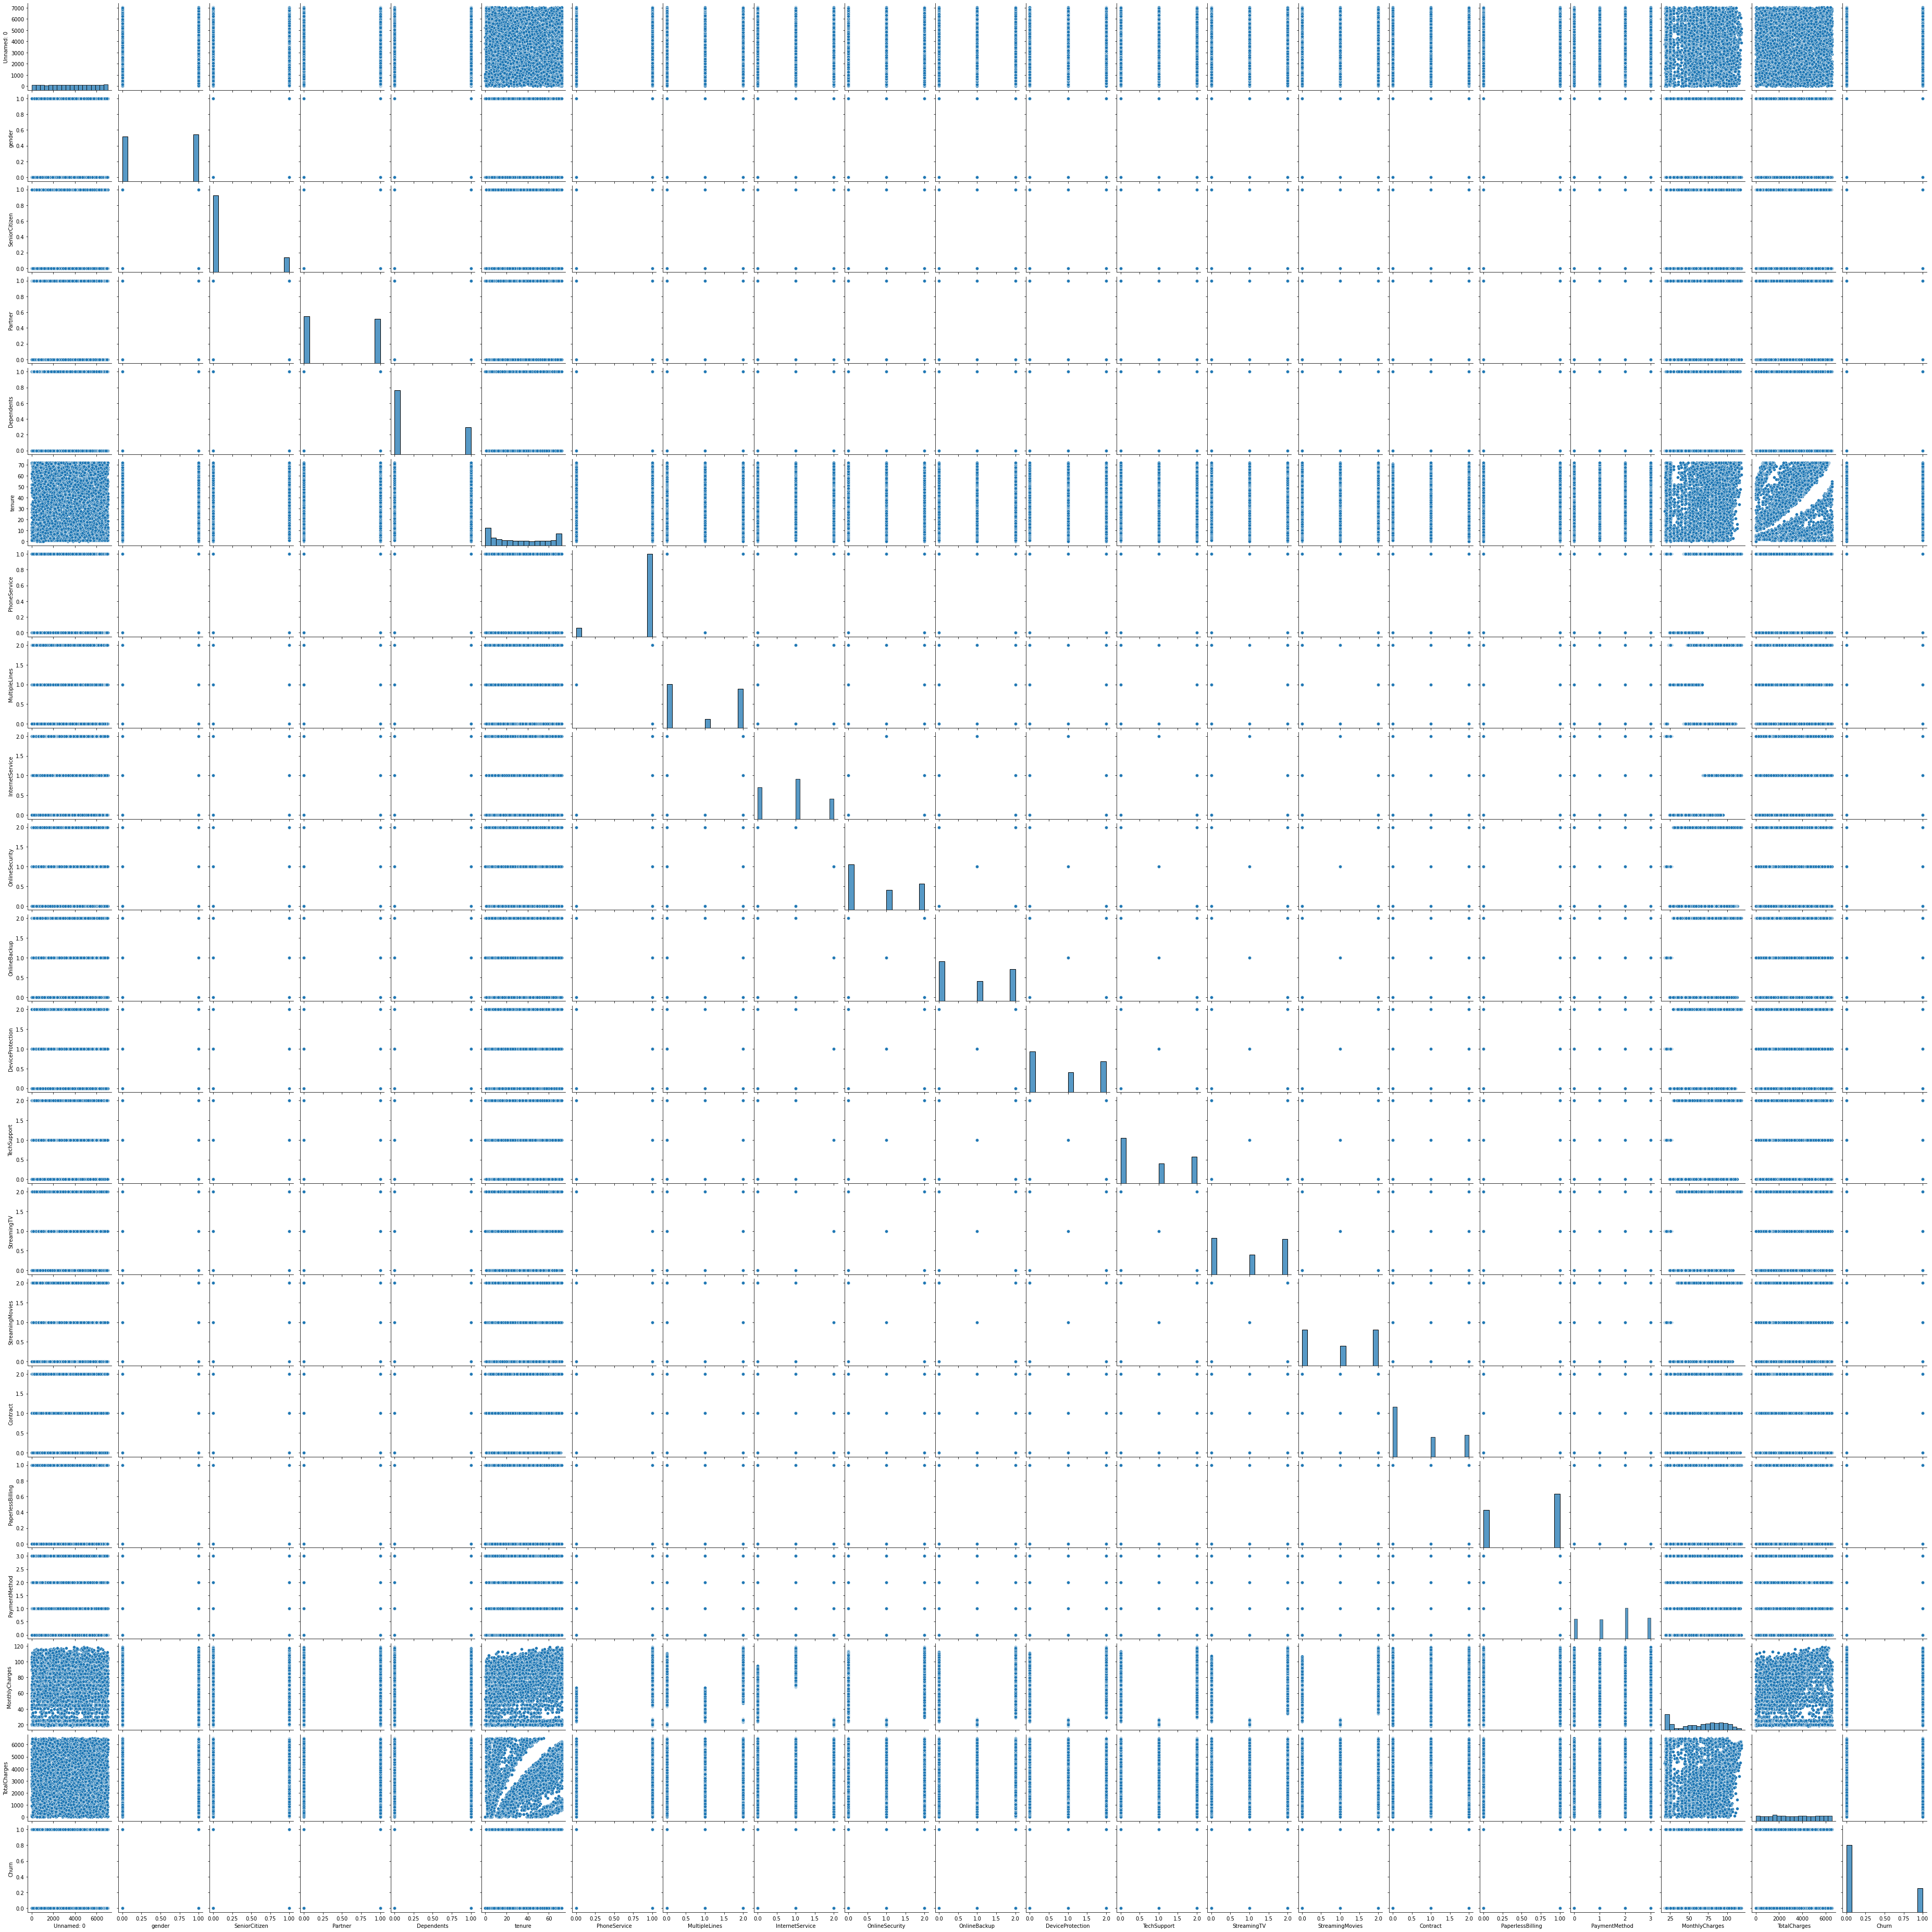

In [12]:
g = sns.pairplot(df)

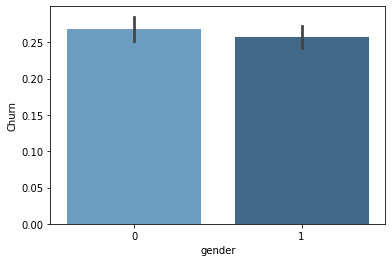

In [13]:
bar = sns.barplot(x="gender", y="Churn", data=df, palette="Blues_d")

In [14]:
df.corr()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
Unnamed: 0,1.000000,-0.000100,0.000731,-0.001294,-0.011669,0.001884,-0.034278,-0.013540,-0.018709,-0.006494,...,-0.013033,0.006410,-0.005278,-0.020546,-0.003440,0.010875,0.025083,-0.014253,0.015267,0.010374
gender,-0.000100,1.000000,-0.005691,-0.010143,0.011058,0.001303,-0.009706,-0.000430,-0.005294,-0.020189,...,-0.009305,-0.010619,-0.012994,-0.011420,0.000555,-0.014090,0.010188,-0.018822,-0.022718,-0.011997
SeniorCitizen,0.000731,-0.005691,1.000000,0.016648,-0.211271,0.006176,0.000581,0.129040,-0.040186,-0.129719,...,-0.015922,-0.151078,0.024338,0.043124,-0.151939,0.156417,-0.035050,0.219945,0.040956,0.146549
Partner,-0.001294,-0.010143,0.016648,1.000000,0.447629,0.382432,0.031578,0.151068,0.007205,0.159928,...,0.168815,0.132582,0.136715,0.122310,0.303243,-0.020634,-0.160535,0.105603,0.069859,-0.150053
Dependents,-0.011669,0.011058,-0.211271,0.447629,1.000000,0.162933,-0.005830,-0.020722,0.041972,0.157262,...,0.076783,0.137274,0.045948,0.023907,0.243080,-0.109935,-0.040414,-0.114920,-0.013196,-0.164490
tenure,0.001884,0.001303,0.006176,0.382432,0.162933,1.000000,0.005912,0.354790,-0.032037,0.325451,...,0.369331,0.326993,0.288135,0.301600,0.671184,0.004043,-0.360323,0.253605,0.152843,-0.345544
PhoneService,-0.034278,-0.009706,0.000581,0.031578,-0.005830,0.005912,1.000000,-0.016345,0.385682,-0.007874,...,0.000422,-0.006139,0.055390,0.048362,0.005342,0.014489,0.006362,0.247419,0.081045,0.010122
MultipleLines,-0.013540,-0.000430,0.129040,0.151068,-0.020722,0.354790,-0.016345,1.000000,-0.105796,0.006028,...,0.132798,0.019266,0.172380,0.188860,0.120023,0.172369,-0.176313,0.436398,0.118773,0.031270
InternetService,-0.018709,-0.005294,-0.040186,0.007205,0.041972,-0.032037,0.385682,-0.105796,1.000000,-0.027201,...,0.048320,-0.018510,0.101060,0.092672,0.097158,-0.141856,0.095054,-0.325588,-0.064748,-0.048820
OnlineSecurity,-0.006494,-0.020189,-0.129719,0.159928,0.157262,0.325451,-0.007874,0.006028,-0.027201,1.000000,...,0.182355,0.276510,0.057760,0.065996,0.371159,-0.146473,-0.085892,-0.049605,0.036493,-0.288926


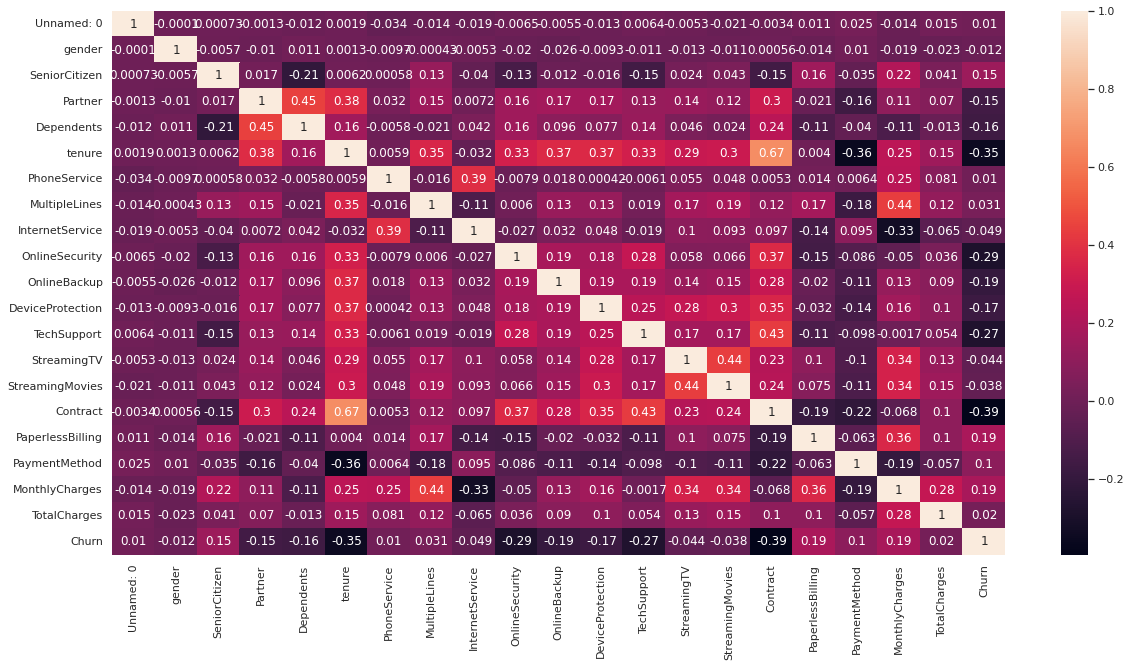

In [171]:
cr = sns.heatmap(df.corr(), annot=True)
sns.set(rc={'figure.figsize':(15,10)})

In [16]:
#Name of all Column
sorted(df)

['Churn',
 'Contract',
 'Dependents',
 'DeviceProtection',
 'InternetService',
 'MonthlyCharges',
 'MultipleLines',
 'OnlineBackup',
 'OnlineSecurity',
 'PaperlessBilling',
 'Partner',
 'PaymentMethod',
 'PhoneService',
 'SeniorCitizen',
 'StreamingMovies',
 'StreamingTV',
 'TechSupport',
 'TotalCharges',
 'Unnamed: 0',
 'gender',
 'tenure']

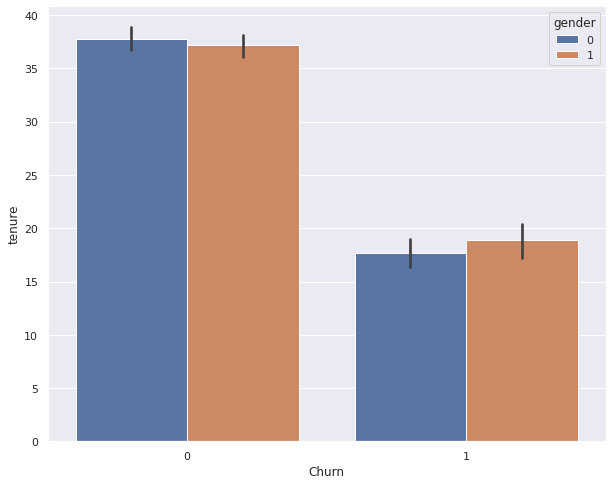

In [17]:
bar = sns.barplot(x="Churn", y="tenure",hue="gender", data=df)
#sns.set(rc={'figure.figsize':(8,5)})
#bar.legend_.remove()

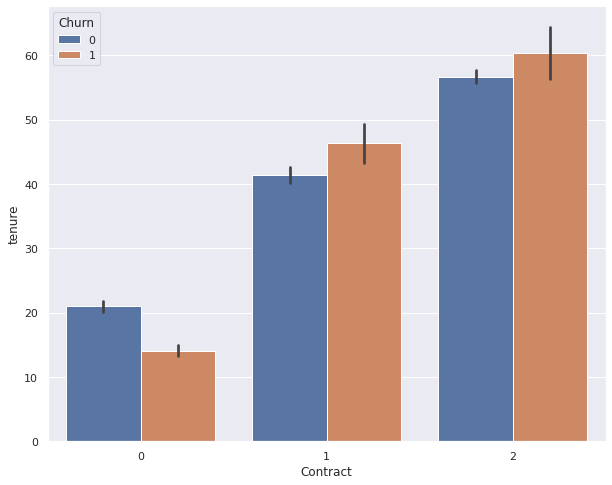

In [18]:
sns.barplot(x="Contract", y="tenure",hue="Churn", data=df)

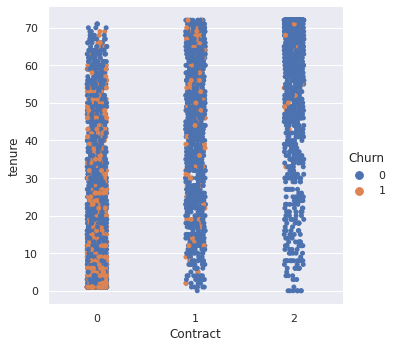

In [19]:
sns.catplot(x="Contract", y="tenure",hue="Churn", data=df)

In [20]:
#Different Service
df_service = df[['DeviceProtection', 
 'InternetService',
 'MultipleLines',
 'OnlineBackup',
 'OnlineSecurity',
 'PhoneService',
 'StreamingMovies',
 'StreamingTV',
 'TechSupport',
 'Churn']]
df_service

,DeviceProtection,InternetService,MultipleLines,OnlineBackup,OnlineSecurity,PhoneService,StreamingMovies,StreamingTV,TechSupport,Churn
0,0,0,1,0,0,0,0,0,0,1
1,2,1,0,0,0,1,0,0,0,0
2,1,2,0,1,1,1,1,1,1,0
3,0,1,2,0,0,1,0,0,0,0
4,0,1,2,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
5277,0,1,0,0,2,1,2,2,0,1
5278,2,0,2,2,2,1,2,2,2,0
5279,1,2,0,1,1,1,1,1,1,0
5280,2,1,2,0,0,1,2,2,0,1


In [21]:
df_service.corr()

,DeviceProtection,InternetService,MultipleLines,OnlineBackup,OnlineSecurity,PhoneService,StreamingMovies,StreamingTV,TechSupport,Churn
DeviceProtection,1.000000,0.048320,0.132798,0.191348,0.182355,0.000422,0.301894,0.278896,0.247866,-0.173138
InternetService,0.048320,1.000000,-0.105796,0.032058,-0.027201,0.385682,0.092672,0.101060,-0.018510,-0.048820
MultipleLines,0.132798,-0.105796,1.000000,0.134460,0.006028,-0.016345,0.188860,0.172380,0.019266,0.031270
OnlineBackup,0.191348,0.032058,0.134460,1.000000,0.186626,0.017500,0.151145,0.142882,0.189892,-0.193152
OnlineSecurity,0.182355,-0.027201,0.006028,0.186626,1.000000,-0.007874,0.065996,0.057760,0.276510,-0.288926
PhoneService,0.000422,0.385682,-0.016345,0.017500,-0.007874,1.000000,0.048362,0.055390,-0.006139,0.010122
StreamingMovies,0.301894,0.092672,0.188860,0.151145,0.065996,0.048362,1.000000,0.437809,0.172420,-0.038240
StreamingTV,0.278896,0.101060,0.172380,0.142882,0.057760,0.055390,0.437809,1.000000,0.174178,-0.043920
TechSupport,0.247866,-0.018510,0.019266,0.189892,0.276510,-0.006139,0.172420,0.174178,1.000000,-0.274718
Churn,-0.173138,-0.048820,0.031270,-0.193152,-0.288926,0.010122,-0.038240,-0.043920,-0.274718,1.000000


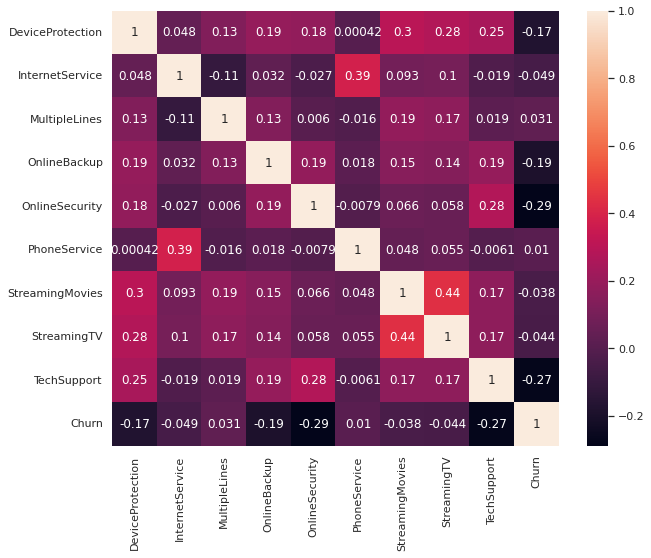

In [22]:
sns.heatmap(df_service.corr(), annot=True)
sns.set(rc={'figure.figsize':(15,8)})

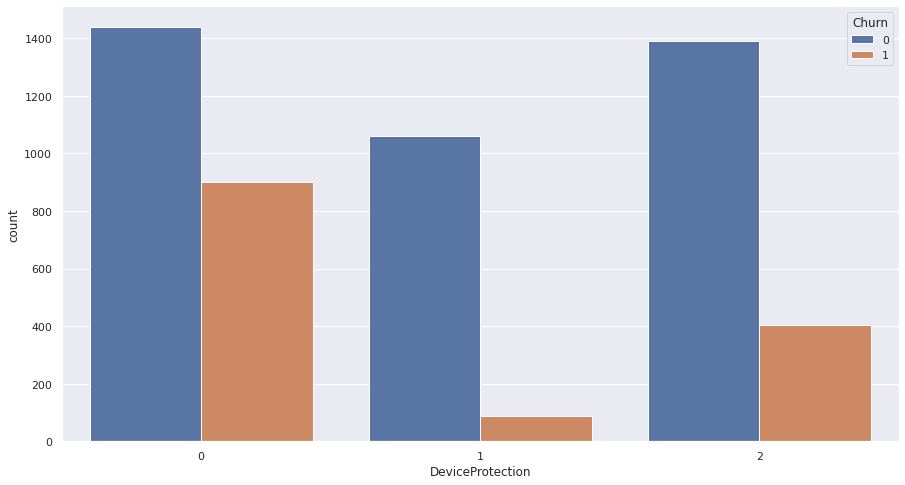

In [23]:
sns.countplot(data=df_service, x='DeviceProtection', hue='Churn')

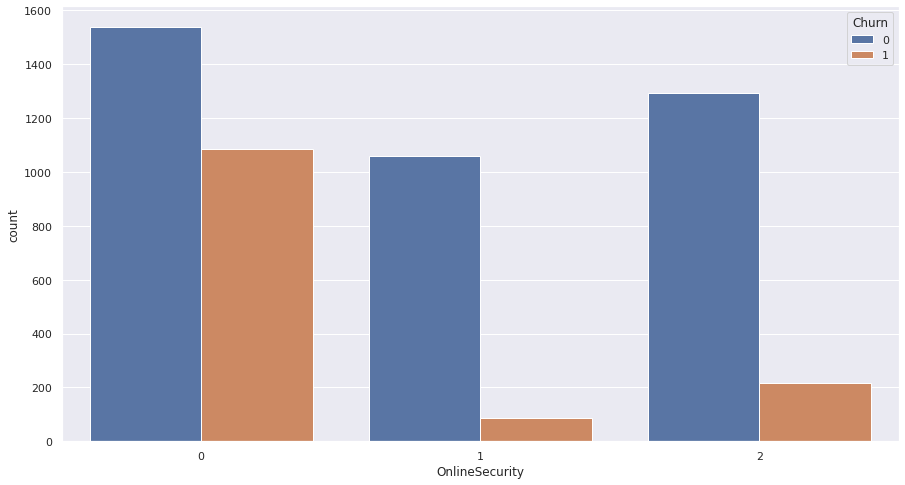

In [24]:
sns.countplot(data=df_service, x='OnlineSecurity', hue='Churn')
              

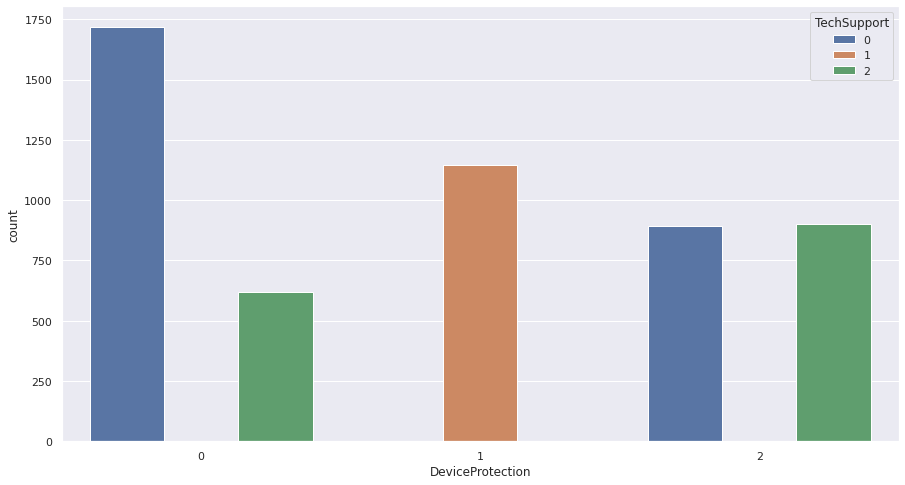

In [25]:
sns.countplot(x='DeviceProtection', hue='TechSupport', data=df_service)

**Total number Users for different services categories**

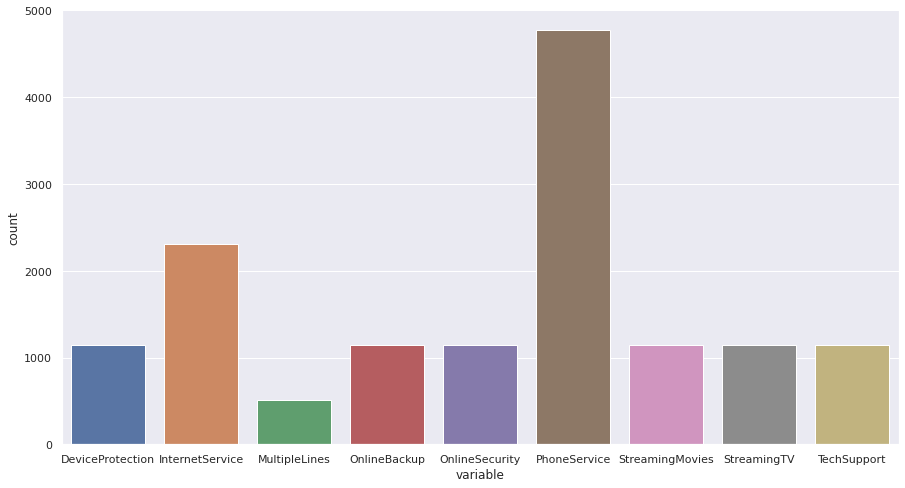

In [26]:

df_s= df_service.drop('Churn', axis=1)
df_cplot = df_s.melt(value_vars=df_s.columns)
df_cplot = df_cplot[df_cplot["value"] == 1] #atleast take 1
sns.countplot(data=df_cplot, x="variable")
plt.show()
sns.set(rc={'figure.figsize':(15,8)})

# Data Preprocessing

In [27]:
df1 = df.drop('Unnamed: 0', axis = 1)

#Feature Scaling / Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder

In [29]:
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [30]:
from pandas.core.dtypes.common import is_numeric_dtype

for column in df1.columns:
    if is_numeric_dtype(df1[column]):
        continue
    else:
        df1[column] = label.fit_transform(df[column])

In [31]:
df1.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.30,2153,1
1,0,0,0,0,7,1,0,1,0,0,2,0,0,0,0,1,2,75.15,4396,0
2,0,0,0,1,4,1,0,2,1,1,1,1,1,1,0,1,0,20.05,6211,0


#Task-02 and Task-03 Create ML Model and Evaluate Model using Different CROSS VALIDATION (without sampling and with sampling)

# 1. Holdout Cross Validation without sampling

In [32]:
df.head(3)

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6607,1,0,0,1,1,0,1,0,0,...,0,0,0,0,0,1,2,25.30,2153,1
1,2598,0,0,0,0,7,1,0,1,0,...,2,0,0,0,0,1,2,75.15,4396,0
2,2345,0,0,0,1,4,1,0,2,1,...,1,1,1,1,0,1,0,20.05,6211,0


In [33]:
df.count().isna

<bound method Series.isna of Unnamed: 0          5282
gender              5282
SeniorCitizen       5282
Partner             5282
Dependents          5282
tenure              5282
PhoneService        5282
MultipleLines       5282
InternetService     5282
OnlineSecurity      5282
OnlineBackup        5282
DeviceProtection    5282
TechSupport         5282
StreamingTV         5282
StreamingMovies     5282
Contract            5282
PaperlessBilling    5282
PaymentMethod       5282
MonthlyCharges      5282
TotalCharges        5282
Churn               5282
dtype: int64>

**Target and Feature**

In [34]:
y = df['Churn']
X= df.copy()
X=X.drop(['Unnamed: 0', 'Churn'], axis=1)

In [35]:
y.head(2)

0    1
1    0
Name: Churn, dtype: int64

In [36]:
X.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,2,25.30,2153
1,0,0,0,0,7,1,0,1,0,0,2,0,0,0,0,1,2,75.15,4396


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [38]:
X_train.shape

(3697, 19)

In [39]:
X_test.shape

(1585, 19)

# ML Model Creation 

**1. Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train,y_train)
y_pred_lg = lg.predict(X_test)

In [41]:
#Accuracy Check
lg.score(X_test , y_test)

0.7867507886435331

**2. Decision Tree Classifier**

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_d = dtc.predict(X_test)

In [43]:
#Accuracy Check
dtc.score(X_test , y_test)

0.7047318611987382

**3. XGBOOST Classifier**

In [44]:
!pip install xgboost #install xgboost

In [45]:
import xgboost 
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_x = xgb.predict(X_test)

In [46]:
#Accuracy Check
xgb.score(X_test , y_test)

0.7943217665615142

**4. AdaBoost Classifier**

In [47]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
y_pred_a = ada.predict(X_test)

In [48]:
#Accuracy Check
ada.score(X_test , y_test)

0.7867507886435331

# 2.K Fold Cross Validation without sampling

In [49]:
from sklearn.model_selection import KFold, cross_val_score

In [50]:
kfold = KFold(n_splits=5) #each fold contain 25% data

In [51]:
result_kfold= cross_val_score(xgb, X, y,cv=kfold) 

In [52]:
result_kfold

array([0.8268685 , 0.79754021, 0.80018939, 0.79356061, 0.81344697])

In [53]:
result_kfold.max()

0.826868495742668

In [54]:
result_kfold.min()

0.7935606060606061

# 3. Stratified k fold cross Validation without sampling

In [55]:
from sklearn.model_selection import StratifiedKFold

In [56]:
st = StratifiedKFold(n_splits=5)

In [57]:
score_stratified_k = cross_val_score(xgb, X, y,cv=st)

In [58]:
score_stratified_k

array([0.82403027, 0.80605487, 0.80492424, 0.79261364, 0.80492424])

In [59]:
score_stratified_k.min()

0.7926136363636364

In [60]:
score_stratified_k.max()

0.8240302743614002

#4. Leave One Out Cross Validation without sampling

---



In [61]:
#from sklearn.model_selection import LeaveOneOut
#le = LeaveOneOut()
#result = cross_val_score(xgb,X,y,cv=le)
#result
#result.mean()

# Graphical representation of accuracy value without sampling

In [62]:
lg_ws_G = 'Accuracy of CrossValidation-Logestic_without_sample'
dtc_ws_G = 'Accuracy of CrossValidation-Decision-Tree_without_sample'
xgb_ws_G = 'Accuracy of CrossValidation-XGBOOST_without_sample'
ada_ws_G = 'Accuracy of CrossValidation-ADABOOST_without_sample'
xgb_kfold_ws_G= 'Accuracy of Kfold-XGBOOST_without_sample'
xgb_st_k_ws_G= 'Accuracy of stratified_Kfold-XGBOOST_without_sample'
df_ws_accuracy=pd.DataFrame([[lg_ws_G,lg.score(X_test, y_test)],[dtc_ws_G, dtc.score(X_test , y_test)], 
                             [xgb_ws_G, xgb.score(X_test , y_test)], [ada_ws_G, ada.score(X_test , y_test)], 
                             [xgb_kfold_ws_G, result_kfold.max() ], [xgb_st_k_ws_G, score_stratified_k.max()]],
                 columns=['Accuracy', 'Value'])
df_ws_accuracy

,Accuracy,Value
0,Accuracy of CrossValidation-Logestic_without_s...,0.786751
1,Accuracy of CrossValidation-Decision-Tree_with...,0.704732
2,Accuracy of CrossValidation-XGBOOST_without_sa...,0.794322
3,Accuracy of CrossValidation-ADABOOST_without_s...,0.786751
4,Accuracy of Kfold-XGBOOST_without_sample,0.826868
5,Accuracy of stratified_Kfold-XGBOOST_without_s...,0.824030


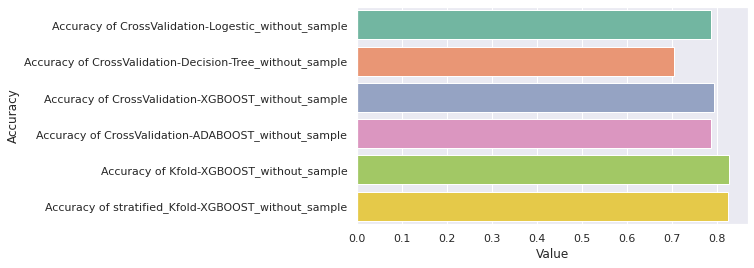

In [178]:
sns.set()
sns.barplot(x="Value", y="Accuracy",  data=df_ws_accuracy, palette="Set2")
sns.set(rc={'figure.figsize':(7,5)})

# ML Create and CROSS Validation  with Synthetic Minority Oversampling Technique (SMOTETomek)

In [64]:
## https://imbalanced-learn.org/dev/references/generated/imblearn.combine.SMOTETomek.html

In [65]:
!pip install imblearn

In [66]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek(random_state=42)

In [67]:
X.shape

(5282, 19)

In [68]:
y.shape

(5282,)

In [69]:
X_sm, y_sm = sm.fit_resample(X,y)

In [70]:
#after sampling
X_sm.shape

(7178, 19)

In [71]:
#after sampling
y_sm.shape

(7178,)

#1. Holdout Cross Validation (SMOTETomek)

In [72]:
from sklearn.model_selection import train_test_split
X_sm_train, X_sm_test, y_sm_train, y_sm_test=train_test_split(X_sm,y_sm, test_size=0.3, random_state=42)

In [73]:
X_sm_train.shape

(5024, 19)

In [74]:
X_sm_test.shape

(2154, 19)

# ML Model with Synthetic Minority Oversampling Technique (SMOTETomek)

**1. Logestic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_sm = LogisticRegression()
lg_sm.fit(X_sm_train,y_sm_train)
y_pred_lg_sm = lg.predict(X_sm_test)

In [76]:
#Accuracy Check
lg_sm.score(X_sm_test , y_sm_test)

0.808263695450325

**2. Decision Tree Classifier**

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc_sm=DecisionTreeClassifier()
dtc_sm.fit(X_sm_train,y_sm_train)
y_pred_d_sm = dtc_sm.predict(X_sm_test)

In [78]:
#Accuracy Check
dtc_sm.score(X_sm_test , y_sm_test)

0.8064066852367688

**3. XGBOOST Classifier**

In [79]:
!pip install xgboost #install xgboost

In [80]:
import xgboost 
from xgboost import XGBClassifier
xgb_sm = XGBClassifier()
xgb_sm.fit(X_sm_train,y_sm_train)
y_pred_x_sm = xgb_sm.predict(X_sm_test)

In [81]:
#Accuracy Check
xgb_sm.score(X_sm_test , y_sm_test)

0.8351903435468895

**4. AdaBoost Classifier**

In [82]:
from sklearn.ensemble import AdaBoostClassifier
ada_sm = AdaBoostClassifier()
ada_sm.fit(X_sm_train,y_sm_train)
y_pred_a_sm = ada_sm.predict(X_sm_test)

In [83]:
#Accuracy Check
ada_sm.score(X_sm_test , y_sm_test)

0.8272980501392758

#2.K Fold Cross Validation (SMOTETomek)

In [84]:
from sklearn.model_selection import KFold, cross_val_score

In [85]:
kfold_sm = KFold(n_splits=5) #each fold contain 20% data

In [86]:
result_kfold_sm = cross_val_score(xgb_sm, X_sm, y_sm,cv=kfold) 

In [87]:
result_kfold_sm

array([0.78760446, 0.79665738, 0.75905292, 0.89059233, 0.89825784])

In [88]:
result_kfold_sm.min()

0.7590529247910863

In [89]:
result_kfold_sm.max()

0.8982578397212544

#3. Stratified k fold cross Validation(SMOTETomek)

In [90]:
from sklearn.model_selection import StratifiedKFold

In [91]:
st_sm = StratifiedKFold(n_splits=5)

In [92]:
score_stratified_k_sm = cross_val_score(xgb_sm, X_sm, y_sm,cv=st_sm)

In [93]:
score_stratified_k_sm

array([0.74930362, 0.79874652, 0.88997214, 0.86898955, 0.87735192])

In [94]:
score_stratified_k_sm.min()

0.7493036211699164

In [95]:
score_stratified_k_sm.max()

0.8899721448467967

#4. Leave One Out Cross Validation (SMOTETomek) Oversampling

---



In [96]:
#from sklearn.model_selection import LeaveOneOut
#le_sm = LeaveOneOut()
#result_sm = cross_val_score(xgb_sm,X_sm,y_sm,cv=le_sm)
#result_sm
#result_sm.mean()

# Graphical representation of accuracy value (SMOTETomek) Oversampling

In [97]:
lg_sm_G = 'Accuracy of CrossValidation-Logestic_sm'
dtc_sm_G = 'Accuracy of CrossValidation-Decision-Tree_sm'
xgb_sm_G = 'Accuracy of CrossValidation-XGBOOST_sm'
ada_sm_G = 'Accuracy of CrossValidation-ADABOOST_sm'
xgb_kfold_sm_G= 'Accuracy of Kfold-XGBOOST_sm'
xgb_st_k_sm_G= 'Accuracy of stratified_Kfold-XGBOOST_sm'
df_sm_accuracy=pd.DataFrame([[lg_sm_G,lg_sm.score(X_sm_test , y_sm_test)],[dtc_sm_G, dtc_sm.score(X_sm_test , y_sm_test)], 
                             [xgb_sm_G, xgb_sm.score(X_sm_test , y_sm_test)], [ada_sm_G, ada_sm.score(X_sm_test , y_sm_test)], 
                             [xgb_kfold_sm_G, result_kfold_sm.max() ], [xgb_st_k_sm_G, score_stratified_k_sm.max()]],
                 columns=['Accuracy', 'Value'])
df_sm_accuracy

,Accuracy,Value
0,Accuracy of CrossValidation-Logestic_sm,0.808264
1,Accuracy of CrossValidation-Decision-Tree_sm,0.806407
2,Accuracy of CrossValidation-XGBOOST_sm,0.835190
3,Accuracy of CrossValidation-ADABOOST_sm,0.827298
4,Accuracy of Kfold-XGBOOST_sm,0.898258
5,Accuracy of stratified_Kfold-XGBOOST_sm,0.889972


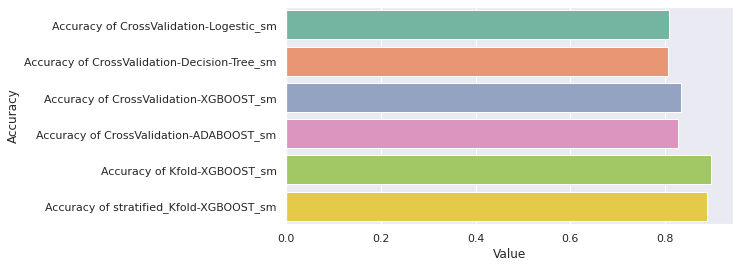

In [98]:
sns.set()
sns.barplot(x="Value", y="Accuracy",  data=df_sm_accuracy, palette="Set2")
sns.set(rc={'figure.figsize':(5,2)})

#ML Create and CROSS Validation with Near Miss for Under_Sampling

In [99]:
from imblearn.under_sampling import NearMiss

In [100]:
# https://imbalanced-learn.org/dev/references/generated/imblearn.under_sampling.NearMiss.html

NearMiss_obj = NearMiss()
X_us , y_us = NearMiss_obj.fit_resample(X,y)

In [101]:
X.shape

(5282, 19)

In [102]:
#after sampling
X_us.shape

(2780, 19)

In [103]:
y.shape

(5282,)

In [104]:
#after sampling
y_us.shape

(2780,)

#1. Holdout Cross Validation (Under Sampling)

In [105]:
from sklearn.model_selection import train_test_split
X_us_train, X_us_test, y_us_train, y_us_test=train_test_split(X_us,y_us, test_size=0.3, random_state=42)

In [106]:
X_us_train.shape

(1946, 19)

In [107]:
X_us_test.shape

(834, 19)

#ML Model 

**1. Logestic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_us = LogisticRegression()
lg_us.fit(X_us_train,y_us_train)
y_pred_lg_us = lg_us.predict(X_us_test)

In [109]:
#Accuracy Check
lg_us.score(X_us_test , y_us_test)

0.6714628297362111

**2. Decision Tree Classifier**

In [110]:
from sklearn.tree import DecisionTreeClassifier
dtc_us=DecisionTreeClassifier()
dtc_us.fit(X_us_train,y_us_train)
y_pred_d_us = dtc_us.predict(X_us_test)

In [111]:
#Accuracy Check
dtc_us.score(X_us_test , y_us_test)

0.6306954436450839

**3. XGBOOST Classifier**

In [112]:
import xgboost 
from xgboost import XGBClassifier
xgb_us = XGBClassifier()
xgb_us.fit(X_us_train,y_us_train)
y_pred_x_us = xgb_us.predict(X_us_test)

In [113]:
#Accuracy Check
xgb_us.score(X_us_test , y_us_test)

0.6858513189448441

**4. AdaBoost Classifier**

In [114]:
from sklearn.ensemble import AdaBoostClassifier
ada_us = AdaBoostClassifier()
ada_us.fit(X_us_train,y_us_train)
y_pred_a_us = ada_us.predict(X_us_test)

In [115]:
#Accuracy Check
ada_us.score(X_us_test , y_us_test)

0.6762589928057554

#2. K Fold Cross Validation (Under Sampling)

In [116]:
from sklearn.model_selection import KFold, cross_val_score

In [117]:
kfold_us = KFold(n_splits=5) #each fold contain 20% data

In [118]:
result_kfold_us = cross_val_score(xgb_us, X_us, y_us,cv=kfold) 

In [119]:
result_kfold_us

array([0.27338129, 0.47841727, 0.71402878, 0.49820144, 0.42985612])

In [120]:
result_kfold_us.min()

0.2733812949640288

In [121]:
result_kfold_us.max()

0.7140287769784173

#3. Stratified k fold cross Validation(Under Sampling)

In [122]:
from sklearn.model_selection import StratifiedKFold

In [123]:
st_us = StratifiedKFold(n_splits=5)

In [124]:
score_stratified_k_us = cross_val_score(xgb_us, X_us, y_us,cv=st_us)

In [125]:
score_stratified_k_us

array([0.50179856, 0.65647482, 0.69784173, 0.67805755, 0.67086331])

In [126]:
score_stratified_k_us.min()

0.5017985611510791

In [127]:
score_stratified_k_us.max()

0.697841726618705

#4. Leave One Out Cross Validation (Under Sampling)

---



In [128]:
#from sklearn.model_selection import LeaveOneOut
#le_us = LeaveOneOut()
#result_us = cross_val_score(xgb_us,X_us,y_us,cv=le_us)
#result_us
#result_us.mean()

#Graphical representation of accuracy value for UNDER Sampling

In [129]:
lg_us_G = 'Accuracy of CrossValidation-Logestic_us'
dtc_us_G = 'Accuracy of CrossValidation-Decision-Tree_us'
xgb_us_G = 'Accuracy of CrossValidation-XGBOOST_us'
ada_us_G = 'Accuracy of CrossValidation-ADABOOST_us'
xgb_kfold_us_G= 'Accuracy of Kfold-XGBOOST_us'
xgb_st_k_us_G= 'Accuracy of stratified_Kfold-XGBOOST_us'
df_us_accuracy=pd.DataFrame([[lg_us_G,lg_us.score(X_us_test , y_us_test)],[dtc_us_G, dtc_us.score(X_us_test , y_us_test)], 
                             [xgb_us_G, xgb_us.score(X_us_test , y_us_test)], [ada_us_G, ada_us.score(X_us_test , y_us_test)], 
                             [xgb_kfold_us_G, result_kfold_us.max() ], [xgb_st_k_us_G, score_stratified_k_us.max()]],
                 columns=['Accuracy', 'Value'])
df_us_accuracy

,Accuracy,Value
0,Accuracy of CrossValidation-Logestic_us,0.671463
1,Accuracy of CrossValidation-Decision-Tree_us,0.630695
2,Accuracy of CrossValidation-XGBOOST_us,0.685851
3,Accuracy of CrossValidation-ADABOOST_us,0.676259
4,Accuracy of Kfold-XGBOOST_us,0.714029
5,Accuracy of stratified_Kfold-XGBOOST_us,0.697842


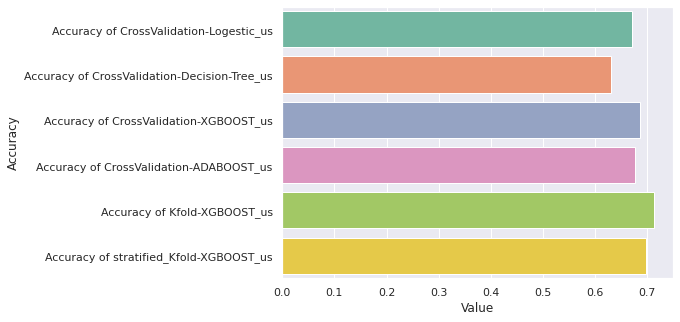

In [179]:
sns.set()
sns.barplot(x="Value", y="Accuracy",  data=df_us_accuracy, palette="Set2")
sns.set(rc={'figure.figsize':(8,3)})

# ML Create and CROSS Validation  with Oversampling

In [131]:
df1.shape

(5282, 20)

In [132]:
# https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

In [133]:
from imblearn.over_sampling import RandomOverSampler

In [134]:
over = RandomOverSampler(random_state=42)

In [135]:
X_os , y_os = over.fit_resample(X,y)

In [136]:
X.shape

(5282, 19)

In [137]:
y.shape

(5282,)

In [138]:
#after sampling
X_os.shape

(7784, 19)

In [139]:
#after sampling
y_os.shape

(7784,)

#1. Holdout Cross Validation (Oversampling-RandomOverSampler)

In [140]:
from sklearn.model_selection import train_test_split
X_os_train, X_os_test, y_os_train, y_os_test=train_test_split(X_os,y_os, test_size=0.3, random_state=42)

In [141]:
X_os_train.shape

(5448, 19)

In [142]:
X_os_test.shape

(2336, 19)

# ML Model with Oversampling-RandomOverSampler

**1. Logestic Regression Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_os = LogisticRegression()
lg_os.fit(X_os_train,y_os_train)
y_pred_lg_os = lg.predict(X_os_test)

In [144]:
#Accuracy Check
lg_os.score(X_os_test , y_os_test)

0.7512842465753424

**2. Decision Tree Classifier**

In [145]:
from sklearn.tree import DecisionTreeClassifier
dtc_os=DecisionTreeClassifier()
dtc_os.fit(X_os_train,y_os_train)
y_pred_d_os = dtc_os.predict(X_os_test)

In [146]:
#Accuracy Check
dtc_os.score(X_os_test , y_os_test)

0.8544520547945206

**3. XGBOOST Classifier**

In [147]:
!pip install xgboost #install xgboost

In [148]:
import xgboost 
from xgboost import XGBClassifier
xgb_os = XGBClassifier()
xgb_os.fit(X_os_train,y_os_train)
y_pred_x_os = xgb_os.predict(X_os_test)

In [149]:
#Accuracy Check
xgb_os.score(X_os_test , y_os_test)

0.771832191780822

**4. AdaBoost Classifier**

In [150]:
from sklearn.ensemble import AdaBoostClassifier
ada_os = AdaBoostClassifier()
ada_os.fit(X_os_train,y_os_train)
y_pred_a_os = ada_os.predict(X_os_test)

In [151]:
#Accuracy Check
ada_os.score(X_os_test , y_os_test)

0.7542808219178082

#2.K Fold Cross Validation (Oversampling-RandomOverSampler)

In [152]:
from sklearn.model_selection import KFold, cross_val_score

In [153]:
kfold_os = KFold(n_splits=5) #each fold contain 20% data

In [154]:
result_kfold_os = cross_val_score(dtc_os, X_os, y_os,cv=kfold) 

In [155]:
result_kfold_os

array([0.82080925, 0.82723186, 0.83044316, 0.9165061 , 0.99807198])

In [156]:
result_kfold_os.min()

0.8208092485549133

In [157]:
result_kfold_os.max()

0.9980719794344473

#3. Stratified k fold cross Validation(Oversampling-RandomOverSampler)

In [158]:
from sklearn.model_selection import StratifiedKFold

In [159]:
st_os = StratifiedKFold(n_splits=5)

In [160]:
score_stratified_k_os = cross_val_score(dtc_os, X_os, y_os,cv=st_os)

In [161]:
score_stratified_k_os

array([0.8625562 , 0.85163776, 0.90879897, 0.90944123, 0.89845758])

In [162]:
score_stratified_k_os.min()

0.8516377649325626

In [163]:
score_stratified_k_os.max()

0.9094412331406551

#4. Leave One Out Cross Validation (Oversampling-RandomOverSampler)

---



In [164]:
#from sklearn.model_selection import LeaveOneOut
#le_os = LeaveOneOut()
#result_os = cross_val_score(dtc_os,X_os,y_os,cv=le_os)
#result_os
#result_os.mean()

# Graphical representation of accuracy value (Oversampling-RandomOverSampler)

In [165]:
lg_os_G = 'Accuracy of CrossValidation-Logestic_os'
dtc_os_G = 'Accuracy of CrossValidation-Decision-Tree_os'
xgb_os_G = 'Accuracy of CrossValidation-XGBOOST_os'
ada_os_G = 'Accuracy of CrossValidation-ADABOOST_os'
dtc_kfold_os_G= 'Accuracy of Kfold-DecisionTree_os'
dtc_st_k_os_G= 'Accuracy of stratified_Kfold-DecisionTree_os'
df_os_accuracy=pd.DataFrame([[lg_os_G,lg_os.score(X_os_test , y_os_test)],[dtc_os_G, dtc_os.score(X_os_test , y_os_test)], 
                             [xgb_os_G, xgb_os.score(X_os_test , y_os_test)], [ada_os_G, ada_os.score(X_os_test , y_os_test)], 
                             [dtc_kfold_os_G, result_kfold_os.max() ], [dtc_st_k_os_G, score_stratified_k_os.max()]],
                 columns=['Accuracy', 'Value'])
df_os_accuracy

,Accuracy,Value
0,Accuracy of CrossValidation-Logestic_os,0.751284
1,Accuracy of CrossValidation-Decision-Tree_os,0.854452
2,Accuracy of CrossValidation-XGBOOST_os,0.771832
3,Accuracy of CrossValidation-ADABOOST_os,0.754281
4,Accuracy of Kfold-DecisionTree_os,0.998072
5,Accuracy of stratified_Kfold-DecisionTree_os,0.909441


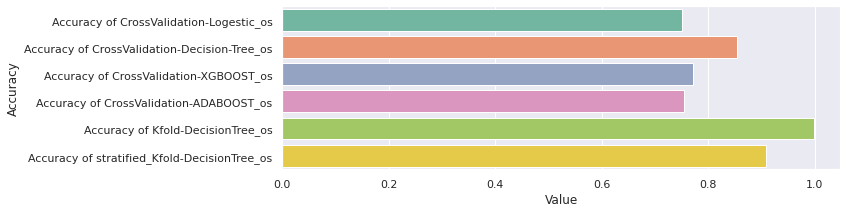

In [166]:
sns.set()
sns.barplot(x="Value", y="Accuracy",  data=df_os_accuracy, palette="Set2")
sns.set(rc={'figure.figsize':(8,4)})

#Task-04: EVALUATE ALL RESULTS

In [167]:
df_compare=pd.concat([df_ws_accuracy, df_sm_accuracy, df_us_accuracy, df_os_accuracy])
df_compare


,Accuracy,Value
0,Accuracy of CrossValidation-Logestic_without_s...,0.786751
1,Accuracy of CrossValidation-Decision-Tree_with...,0.704732
2,Accuracy of CrossValidation-XGBOOST_without_sa...,0.794322
3,Accuracy of CrossValidation-ADABOOST_without_s...,0.786751
4,Accuracy of Kfold-XGBOOST_without_sample,0.826868
5,Accuracy of stratified_Kfold-XGBOOST_without_s...,0.824030
0,Accuracy of CrossValidation-Logestic_sm,0.808264
1,Accuracy of CrossValidation-Decision-Tree_sm,0.806407
2,Accuracy of CrossValidation-XGBOOST_sm,0.835190
3,Accuracy of CrossValidation-ADABOOST_sm,0.827298


In [168]:
df_compare = df_compare.reset_index(drop=True)
df_compare

,Accuracy,Value
0,Accuracy of CrossValidation-Logestic_without_s...,0.786751
1,Accuracy of CrossValidation-Decision-Tree_with...,0.704732
2,Accuracy of CrossValidation-XGBOOST_without_sa...,0.794322
3,Accuracy of CrossValidation-ADABOOST_without_s...,0.786751
4,Accuracy of Kfold-XGBOOST_without_sample,0.826868
5,Accuracy of stratified_Kfold-XGBOOST_without_s...,0.824030
6,Accuracy of CrossValidation-Logestic_sm,0.808264
7,Accuracy of CrossValidation-Decision-Tree_sm,0.806407
8,Accuracy of CrossValidation-XGBOOST_sm,0.835190
9,Accuracy of CrossValidation-ADABOOST_sm,0.827298


**Define Function for labeling the Values in Barplot**

In [169]:
#https://www.statology.org/seaborn-barplot-show-values/
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.4f}'.format(p.get_height()) #decimal number
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.4f}'.format(p.get_width())  #decimal number
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

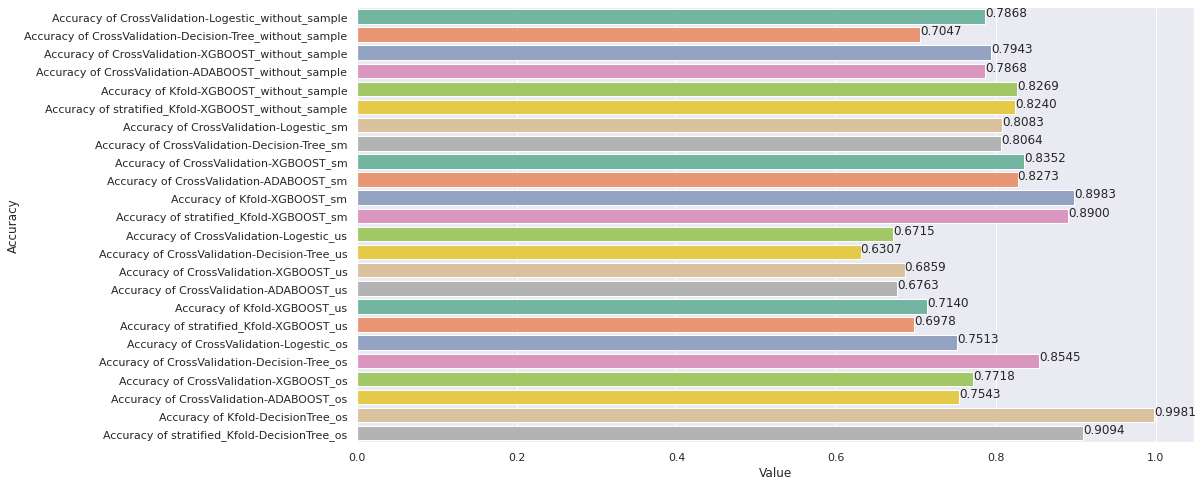

In [183]:
sns.set()
graph=sns.barplot(x="Value", y="Accuracy",  data=df_compare, palette="Set2")
sns.set(rc={'figure.figsize':(14,7)})
show_values(graph, "h", space=0) #for vertical, show_values(p)
 